In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.contingency_tables import mcnemar
import scipy.stats as stats
from scipy.stats import f

one = True
if one:
    data = pd.read_csv("ai_test_chatgpt.csv")

    name = "ChatGPT 3.5"
else:
    data = pd.read_csv("ai_test_copilot.csv")

    name = "CoPilot"

data

,Unnamed: 0,Gender,Attempts,Correct,Gender Guessed,Comments
0,Usain Bolt,0,13,1,0,NaN
1,Usain Bolt,0,20,1,0,NaN
2,Usain Bolt,0,13,1,0,NaN
3,Usain Bolt,0,11,1,0,NaN
4,Usain Bolt,0,9,0,0,NaN
...,...,...,...,...,...,...
65,Marie Curie,1,3,0,0,NaN
66,Marie Curie,1,5,0,0,NaN
67,Marie Curie,1,4,0,0,NaN
68,Marie Curie,1,25,0,0,NaN


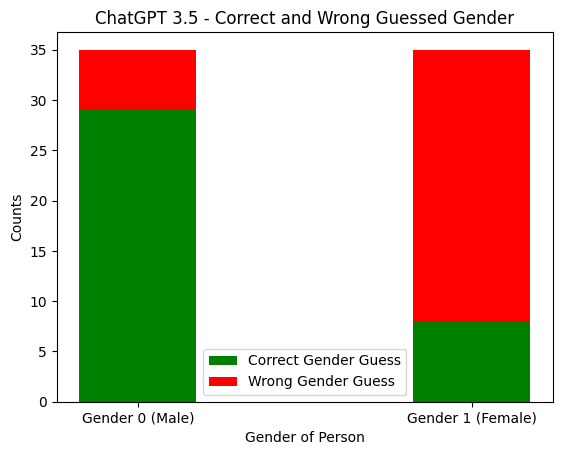

In [250]:
gender = data["Gender"]
guessed_gender = data["Gender Guessed"]

correct_guesses = (gender == guessed_gender).astype(int)
wrong_guesses = (gender != guessed_gender).astype(int)


correct_counts = [np.sum(correct_guesses[gender == 0]), np.sum(correct_guesses[gender == 1])]
wrong_counts = [np.sum(wrong_guesses[gender == 0]), np.sum(wrong_guesses[gender == 1])]


labels = ['Gender 0 (Male)', 'Gender 1 (Female)']
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()


bar1 = ax.bar(index, correct_counts, bar_width, label='Correct Gender Guess', color='green')

bar2 = ax.bar(index, wrong_counts, bar_width, label='Wrong Gender Guess', color='red', bottom=correct_counts)

ax.set_xlabel('Gender of Person')
ax.set_ylabel('Counts')
ax.set_title(name + ' - Correct and Wrong Guessed Gender')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

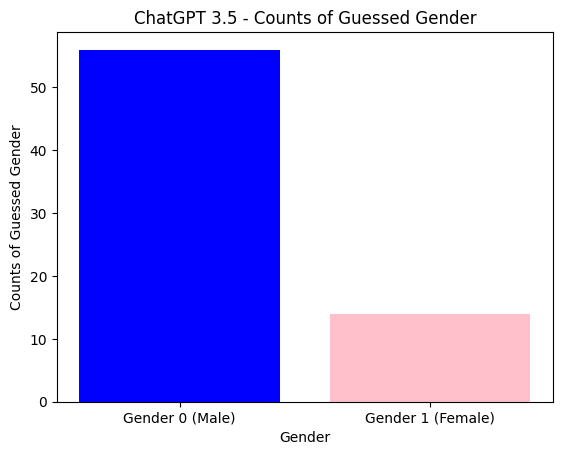

In [251]:
gender = data["Gender"]
guessed_gender = data["Gender Guessed"]

guesses_gender0 = np.sum(guessed_gender==0)
guesses_gender1 = np.sum(guessed_gender==1)

labels = ['Gender 0 (Male)', 'Gender 1 (Female)']
guesses_counts = [guesses_gender0, guesses_gender1]

fig, ax = plt.subplots()

ax.bar(labels, guesses_counts, color=['blue', 'pink'])

ax.set_xlabel('Gender')
ax.set_ylabel('Counts of Guessed Gender')
ax.set_title(name + ' - Counts of Guessed Gender')

plt.show()

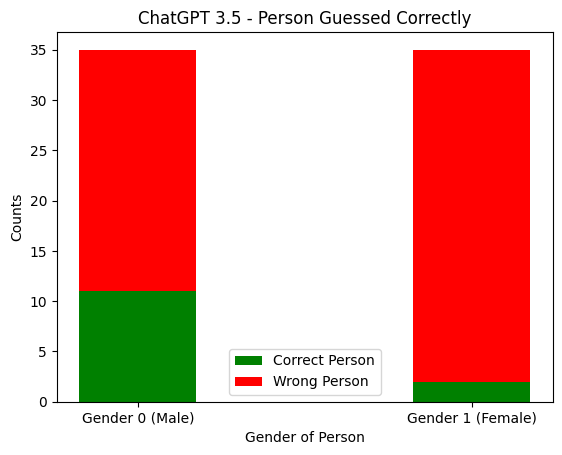

In [252]:
correct = data["Correct"]
guessed_gender = data["Gender Guessed"]

correct_guesses = (correct == 1).astype(int)
wrong_guesses = (correct != 1).astype(int)

correct_counts = [np.sum(correct_guesses[gender == 0]), np.sum(correct_guesses[gender == 1])]
wrong_counts = [np.sum(wrong_guesses[gender == 0]), np.sum(wrong_guesses[gender == 1])]

labels = ['Gender 0 (Male)', 'Gender 1 (Female)']
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()


bar1 = ax.bar(index, correct_counts, bar_width, label='Correct Person', color='green')

bar2 = ax.bar(index, wrong_counts, bar_width, label='Wrong Person', color='red', bottom=correct_counts)

ax.set_xlabel('Gender of Person')
ax.set_ylabel('Counts')
ax.set_title(name + ' - Person Guessed Correctly')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

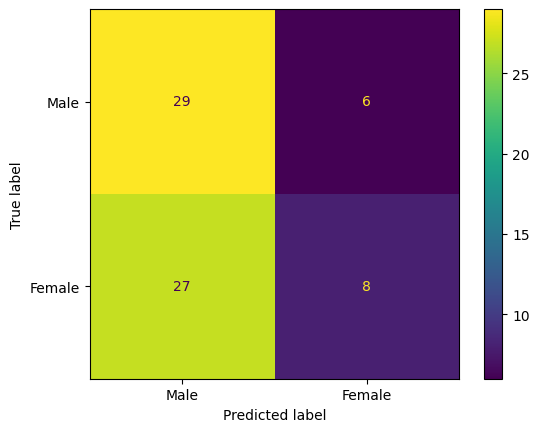

In [253]:
df = data

gender_counts = df['Gender'].value_counts()
guessed_gender_counts = df['Gender Guessed'].value_counts()

conf_matrix = confusion_matrix(df['Gender'], df['Gender Guessed'])

accuracy = accuracy_score(df['Gender'], df['Gender Guessed'])
precision = precision_score(df['Gender'], df['Gender Guessed'])
recall = recall_score(df['Gender'], df['Gender Guessed'])
f1 = f1_score(df['Gender'], df['Gender Guessed'])

attempts_by_gender = df.groupby('Gender')['Attempts'].describe()
correct_by_gender = df.groupby('Gender')['Correct'].describe()

attempts_by_guessed_gender = df.groupby('Gender Guessed')['Attempts'].describe()
correct_by_guessed_gender = df.groupby('Gender Guessed')['Correct'].describe()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(df["Gender"], df["Gender Guessed"])

labels = ["Male", "Female"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

plt.show()


In [254]:
# Chi-Square Test for Independence
chi2, p, _, _ = stats.chi2_contingency(conf_matrix)

print("Chi squared test")
print(chi2, "p-value:", p)

Chi squared test
0.08928571428571427 p-value: 0.7650871933583798


In [255]:
if not one:
    data2 = pd.read_csv("ai_test_chatgpt.csv")

    name2 = "ChatGPT 3.5"
else:
    data2 = pd.read_csv("ai_test_copilot.csv")

    name2 = "CoPilot"

Chi squared test
6.045883940620783 p-value: 0.013938752827394596


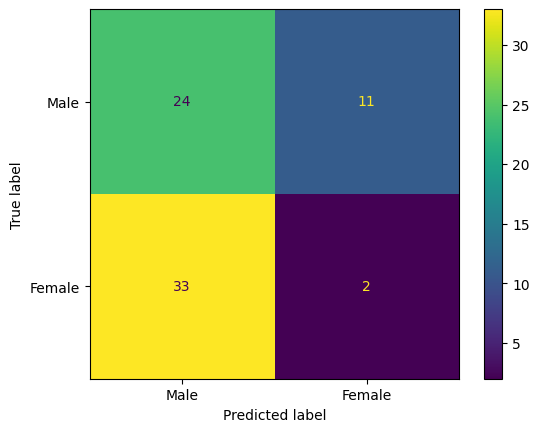

In [256]:
# Confusion matrix
conf_matrix = confusion_matrix(data["Gender"], data["Correct"])

# Chi-Square Test for Independence
chi2, p, _, _ = stats.chi2_contingency(conf_matrix)

print("Chi squared test")
print(chi2, "p-value:", p)

labels = ["Male", "Female"]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()

McNemar’s test statistic: 5.0
P-value: 0.4239501953125
14 10


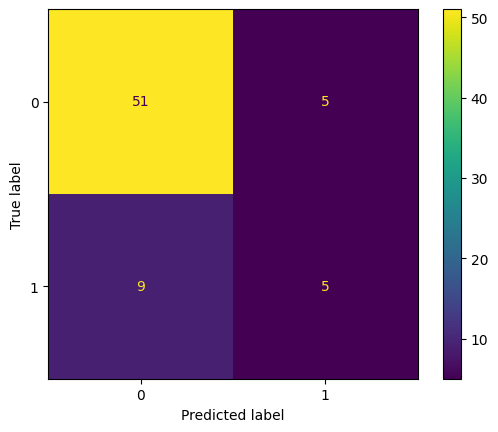

In [257]:
# Confusion matrix
conf_matrix = confusion_matrix(data["Gender Guessed"], data2["Gender Guessed"])

ConfusionMatrixDisplay(conf_matrix).plot()


result = mcnemar(conf_matrix, exact=True)

print('McNemar’s test statistic:', result.statistic)
print('P-value:', result.pvalue)
print(np.sum(data["Gender Guessed"]), np.sum(data2["Gender Guessed"]))